# Question 1
Givens:
$$P(\text{pass}) = 0.9, \text{ thus } P(\text{fail}) = 0.1$$
$$P(\text{quick} \mid \text{pass}) = 0.6$$
$$P(\text{quick} \mid \text{fail}) = 0.3$$


By law of total probability:
$$
P(\text{quick}) = P(\text{quick} \mid \text{pass}) P(\text{pass}) + P(\text{quick} \mid \text{fail}) P(\text{fail})
$$

$$
P(\text{quick}) = (0.6)(0.9) + (0.3)(0.1)
$$

$$
P(\text{quick}) = 0.54 + 0.03 = 0.57
$$


Using Bayes' Theorem: 
$$
P(\text{pass} \mid \text{quick}) = \frac{P(\text{quick} \mid \text{pass}) P(\text{pass})}{P(\text{quick})}
$$

$$
P(\text{pass} \mid \text{quick}) = \frac{(0.6)(0.9)}{0.57} = 0.947
$$

Thus, 94.7% of students who answer a question quickly will pass the class.


# Question 2

### Likelihood

The likelihood is multinomial:

\[
\text{PMF} = P(x_1, \ldots, x_n \mid \Theta, n) = c \cdot \prod_{i=1}^n \Theta_i^{x_i}
\]

---

### Prior

The prior is a Dirichlet density function:

\[
P(\Theta \mid \alpha) = c' \cdot \prod_{i=1}^n \Theta_i^{\alpha_i - 1}
\]

---

### Posterior

The posterior is proportional to the likelihood times the prior:

\[
\text{Posterior} \propto \text{Likelihood} \cdot \text{Prior}
\]

\[
\propto \left[ \prod_{i=1}^n \Theta_i^{x_i} \right] \cdot \left[ \prod_{i=1}^n \Theta_i^{\alpha_i - 1} \right]
\]

\[
\propto \prod_{i=1}^n \Theta_i^{x_i + \alpha_i - 1}
\]

This is the kernel of the Dirichlet function:

\[
\text{Dirichlet}(\alpha_1 + x_1, \ldots, \alpha_n + x_n)
\]

---

### Final Posterior

The posterior is:

\[
P(\Theta \mid x, n, \alpha) = \text{Dirichlet distribution with parameters: } \alpha = (\alpha_1 + x_1, \ldots, \alpha_n + x_n)
\]

\[
= \frac{1}{B(\alpha)} \cdot \prod_{i=1}^n \Theta_i^{x_i + \alpha_i - 1}
\]

where \( B(\alpha) \) is:

\[
B(\alpha) = \frac{\prod_{i=1}^n \Gamma(\alpha_i + x_i)}{\Gamma(\alpha_0)}
\]

and \( \alpha_0 \) is:

\[
\alpha_0 = \sum_{i=1}^n (\alpha_i + x_i)
\]

# Question 3

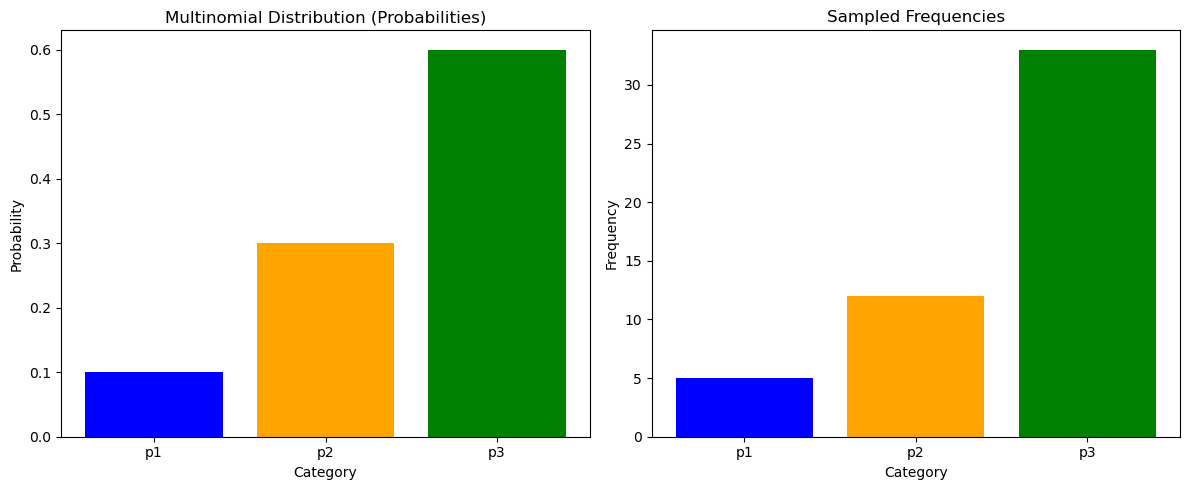

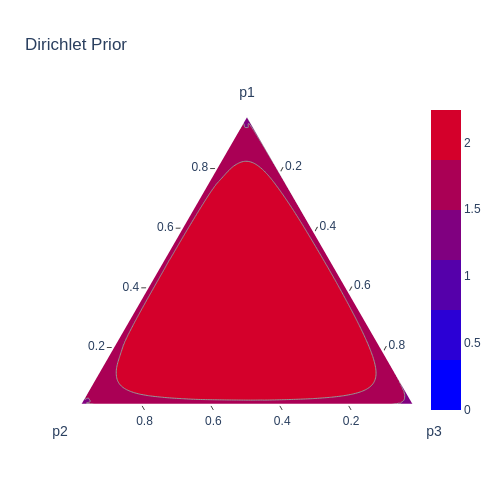

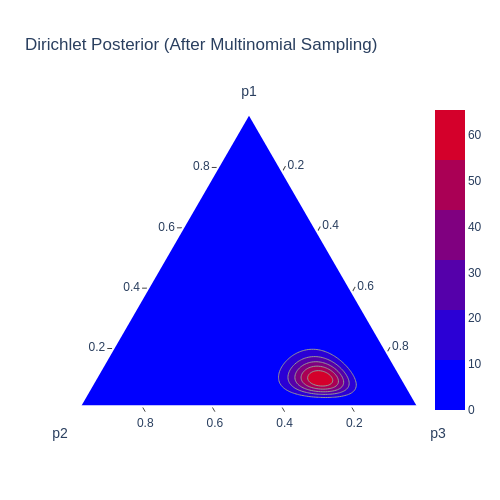

In [61]:
from scipy import stats
import plotly.figure_factory as ff
import numpy as np


# Multinomial Sample
n = 50
p = [0.1, 0.3, 0.6]

categories = ['p1', 'p2', 'p3'] 
sample = np.random.multinomial(n, p, size = 1)


# Aggregate sample frequencies across trials
sample_totals = np.sum(sample, axis=0)

# 1. Visualize the multinomial distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(categories, p, color=['blue', 'orange', 'green'])
plt.title("Multinomial Distribution (Probabilities)")
plt.ylabel("Probability")
plt.xlabel("Category")

# 2. Visualize the multinomial samples
plt.subplot(1, 2, 2)
plt.bar(categories, sample_totals, color=['blue', 'orange', 'green'])
plt.title("Sampled Frequencies")
plt.ylabel("Frequency")
plt.xlabel("Category")

plt.tight_layout()
plt.show()




# initialize dirichlet prior

p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array([1.1, 1.1, 1.1])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)



# Obtaining posterior 

alpha_posterior = alpha_prior + sample_totals #sample is the observed data

dirichlet_posterior = dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# Visualizing prior using ternary plot
fig_prior = ff.create_ternary_contour(
    p.T, dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_prior.update_layout(title="Dirichlet Prior")
fig_prior.show('png')

# Visualizing posterior using ternary plot

fig_posterior = ff.create_ternary_contour(
    p.T, dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_posterior.update_layout(title="Dirichlet Posterior (After Multinomial Sampling)")
fig_posterior.show('png')